In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
DF = pd.read_csv('salessalary.csv')

In [6]:
DF.head()

,Observation,Salary,Position,Experience
0,1,53.94,Inside,Medium
1,2,52.69,Inside,Medium
2,3,70.52,Outside,Low
3,4,52.03,Inside,Medium
4,5,62.28,Outside,Low


In [7]:
DF.describe()

,Observation,Salary
count,120.000000,120.000000
mean,60.500000,64.925667
std,34.785054,10.838727
min,1.000000,48.620000
25%,30.750000,56.275000
50%,60.500000,61.490000
75%,90.250000,76.092500
max,120.000000,88.730000


In [13]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
Observation    120 non-null int64
Salary         120 non-null float64
Position       120 non-null category
Experience     120 non-null category
dtypes: category(2), float64(1), int64(1)
memory usage: 2.4 KB


In [12]:
DF.Experience = pd.Categorical(DF.Experience)

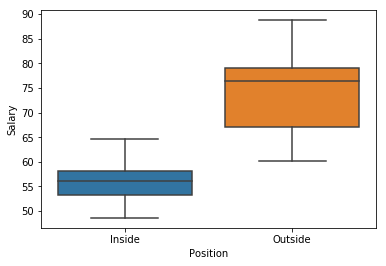

In [14]:
sns.boxplot(x='Position', y='Salary', data=DF)

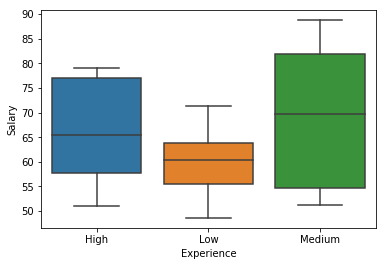

In [15]:
sns.boxplot(x='Experience', y='Salary', data=DF)

In [16]:
formula = 'Salary ~ C(Position)'

In [17]:
model = ols(formula, DF).fit()

In [18]:
aov_table = anova_lm(model)

In [19]:
print(aov_table)

                df       sum_sq      mean_sq           F        PR(>F)
C(Position)    1.0  9515.883000  9515.883000  251.540022  4.965185e-31
Residual     118.0  4463.998147    37.830493         NaN           NaN


In [20]:
formula = 'Salary ~ C(Experience)'

In [21]:
model = ols(formula, DF).fit()

In [22]:
aov_table = anova_lm(model)

In [23]:
print(aov_table)

                  df        sum_sq     mean_sq         F    PR(>F)
C(Experience)    2.0   1668.168302  834.084151  7.926423  0.000591
Residual       117.0  12311.712845  105.228315       NaN       NaN


In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     7.926
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           0.000591
Time:                        13:10:27   Log-Likelihood:                -448.12
No. Observations:                 120   AIC:                             902.2
Df Residuals:                     117   BIC:                             910.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [25]:
formula = 'Salary ~ C(Experience) + C(Position) + C(Experience):C(Position)'

In [26]:
model = ols(formula, DF).fit()

In [27]:
aov_table = anova_lm(model)

In [28]:
print(aov_table)

                              df       sum_sq      mean_sq           F  \
C(Experience)                2.0  1668.168302   834.084151   65.839251   
C(Position)                  1.0  9515.883000  9515.883000  751.145567   
C(Experience):C(Position)    2.0  1351.621545   675.810773   53.345787   
Residual                   114.0  1444.208300    12.668494         NaN   

                                 PR(>F)  
C(Experience)              9.832153e-20  
C(Position)                5.396899e-52  
C(Experience):C(Position)  4.444150e-17  
Residual                            NaN  


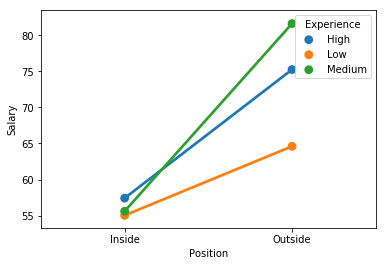

In [31]:
sns.pointplot(x = 'Position' , y = 'Salary', data = DF, hue='Experience', ci=None)

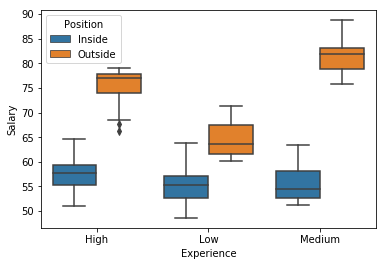

In [32]:
sns.boxplot(x = 'Experience', y='Salary', data=DF, hue = 'Position')